In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop

Text(0.5, 1.0, 'Dataset with two classes')

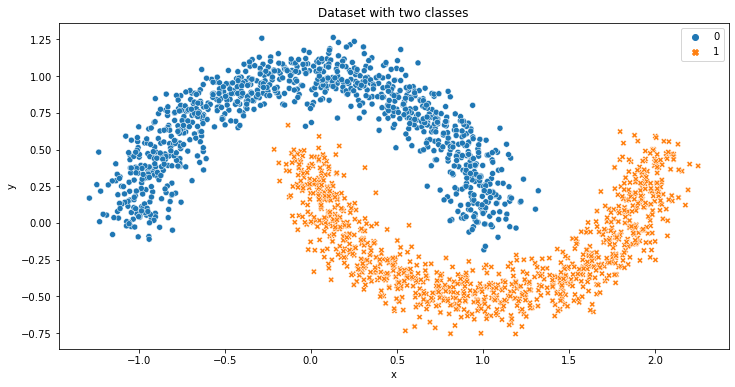

In [234]:
import seaborn as sns
from sklearn.datasets import make_moons

plt.figure(figsize=(12,6))

X, y = make_moons(n_samples=2000, noise=0.1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset with two classes")

In [235]:
?make_moons

In [201]:
def get_model(learning_rate):
    model = keras.Sequential([
        keras.layers.InputLayer(input_shape=(2,)),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(4, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(optimizer=RMSprop(learning_rate=learning_rate), loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

In [202]:
model = get_model(0.001)
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_194 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_195 (Dense)            (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [203]:
def visualize2DSoftmax(X, y, model, title=None):
    plt.figure(figsize=(12,6))
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    
    xv, yv = np.meshgrid(
        np.linspace(x_min, x_max, num=20),                      
        np.linspace(y_min, y_max, num=20), indexing='ij'
    )
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    print(xy_v.shape)
    y_pred = model.predict(xy_v) > 0.5
 
    cs = plt.contourf(xv, yv, y_pred[:,0].reshape(20,20),
    cmap=plt.cm.RdYlBu)
    
    ax = plt.gca()
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=ax)
    
    if title is not None:
        ax.set_title(title)
        
    plt.show()
        

In [204]:
def visualize_history(history, learning_rate, nr_epochs):
    plt.figure()

    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    epochs = range(1, nr_epochs + 1)

    ax[0].plot(epochs, history.history["loss"], label="train loss")
    ax[0].plot(epochs, history.history["val_loss"], label="val loss")
    ax[0].set_xlabel("Epochs")
    ax[0].legend()
    ax[0].set_title(f"Loss by Epoch, learning rate = {learning_rate}")

    ax[1].plot(epochs, history.history["accuracy"], label="train accuracy")
    ax[1].plot(epochs, history.history["val_accuracy"], label="val accuracy")
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_title(f"Accuracy by Epoch, learning rate = {learning_rate}")
    plt.show()
    

In [205]:
def visualize_weights(weights_over_time, learning_rate, nr_epochs):
    plt.figure(figsize=(12,6))

    epochs = range(1, nr_epochs + 1)
    plt.plot(epochs, weights_over_time)
    plt.xlabel("Epochs")
    plt.xticks(epochs)
    plt.ylabel("Weight value")
    plt.title(f"Weight history for 37 weights, learning rate = {learning_rate}")
    plt.show()
    

In [206]:
def train_and_visualize_model(learning_rate, epochs):
    model = get_model(learning_rate)
    
    weights_dict = {}
    weight_callback = LambdaCallback(on_epoch_end=lambda epoch, logs:  weights_dict.update({epoch:model.get_weights()}))

    history = model.fit(X,y, epochs=epochs, verbose=0, validation_split=0.25, callbacks=[weight_callback])
    
    def get_weights_over_time(weights_dict):
        weights_over_time = np.zeros((epochs, 37))

        for epoch, weights in weights_dict.items():
            numbers = []
            for weight in weights:
                numbers.extend(weight.flatten().tolist())

            weights_over_time[epoch] = numbers
        
        return weights_over_time
    
    weights_over_time = get_weights_over_time(weights_dict)
    
    visualize2DSoftmax(X, y, model)
    visualize_history(history, learning_rate, epochs)
    visualize_weights(weights_over_time, learning_rate, epochs)  
    

## Impact of learning rate

[RMSprop](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop)

(400, 2)


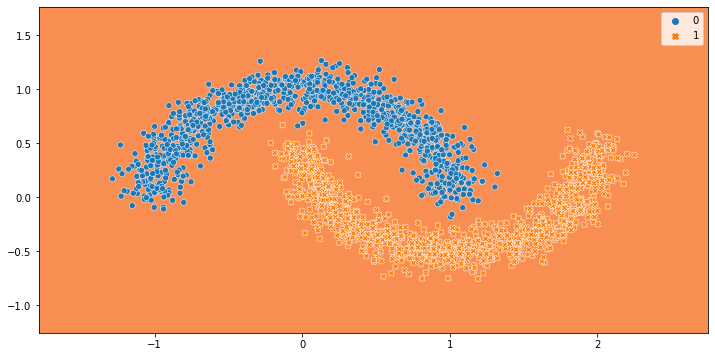

<Figure size 432x288 with 0 Axes>

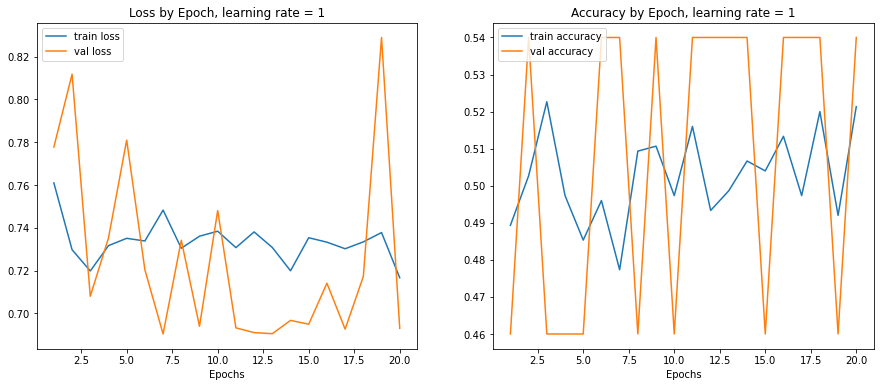

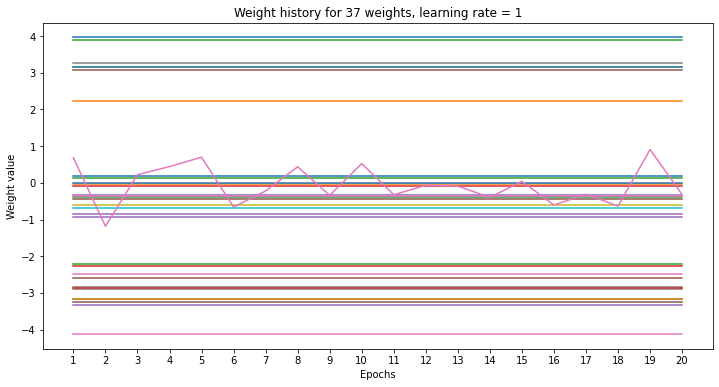

In [243]:
train_and_visualize_model(learning_rate=1, epochs=20)

(400, 2)


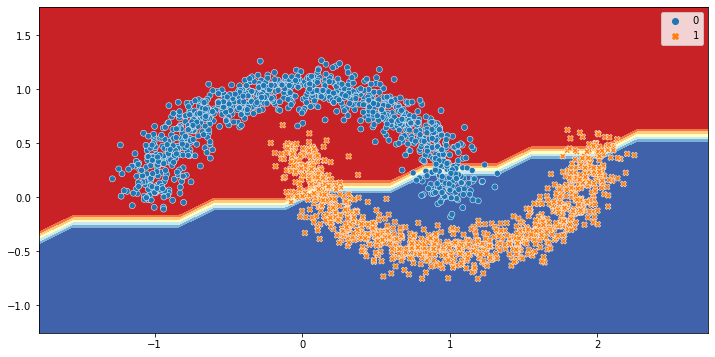

<Figure size 432x288 with 0 Axes>

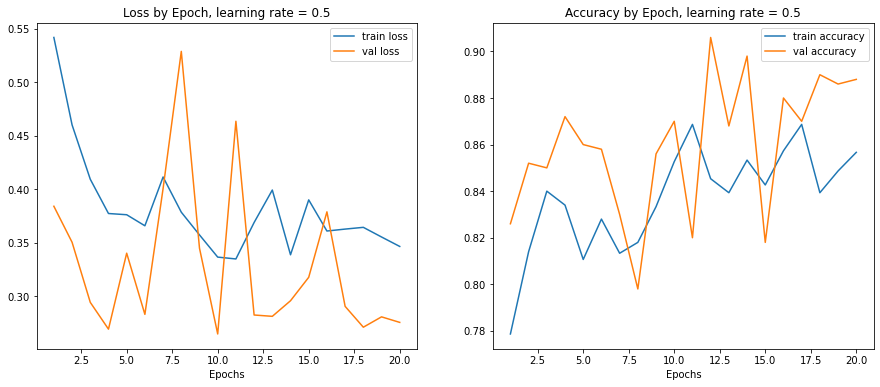

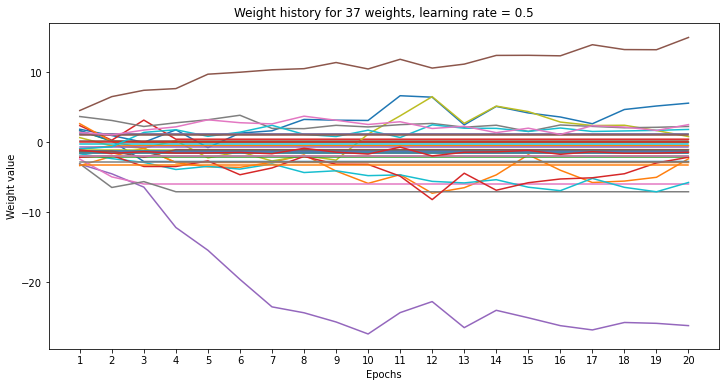

In [246]:
train_and_visualize_model(learning_rate=0.5, epochs=20)

(400, 2)


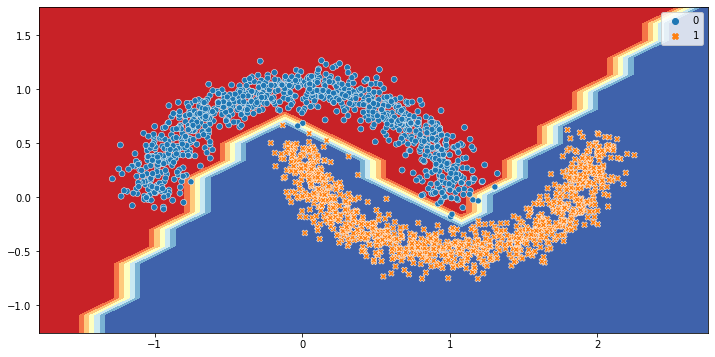

<Figure size 432x288 with 0 Axes>

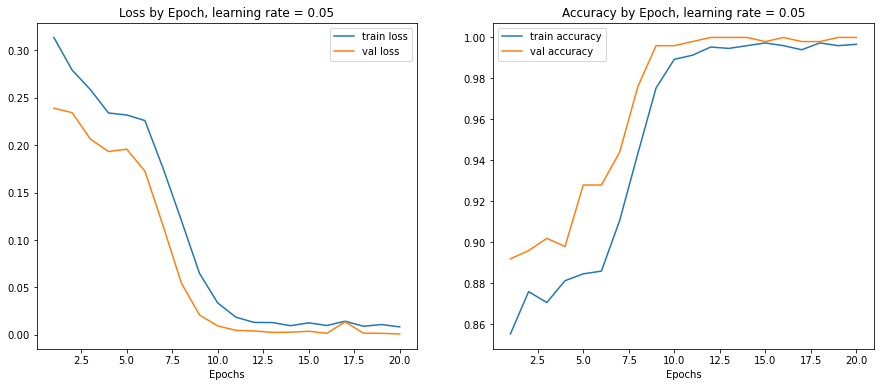

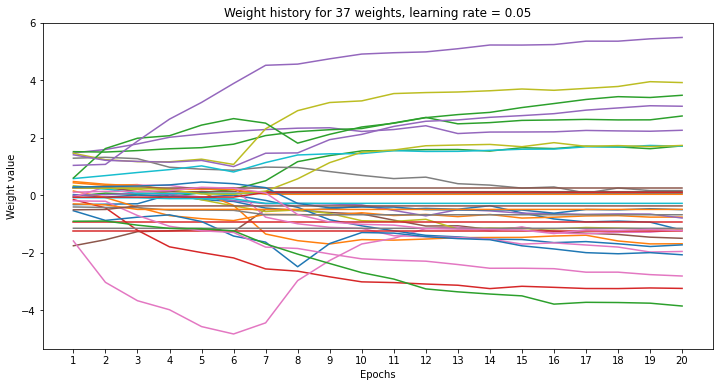

In [247]:
train_and_visualize_model(learning_rate=0.05, epochs=20)

(400, 2)


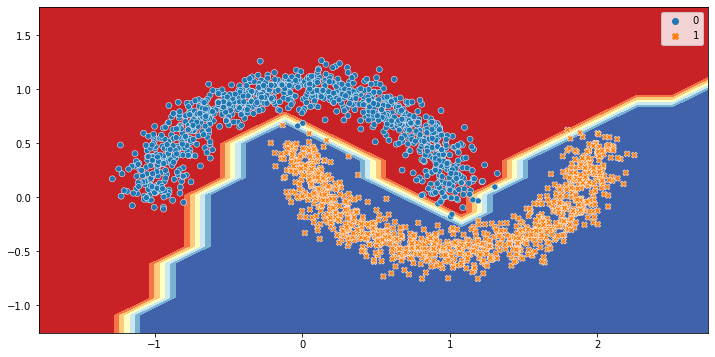

<Figure size 432x288 with 0 Axes>

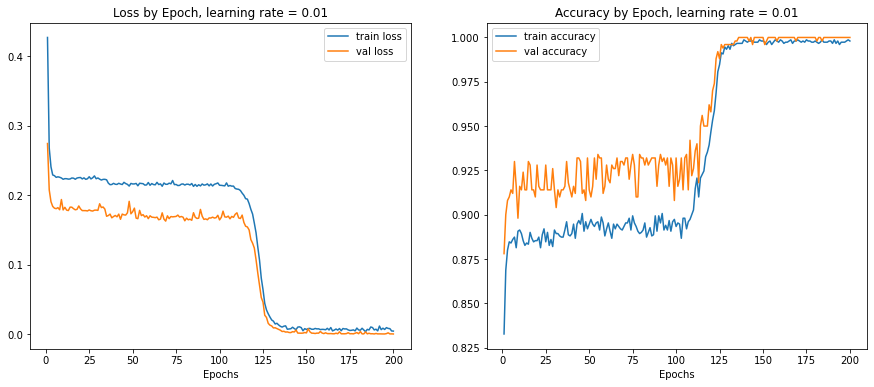

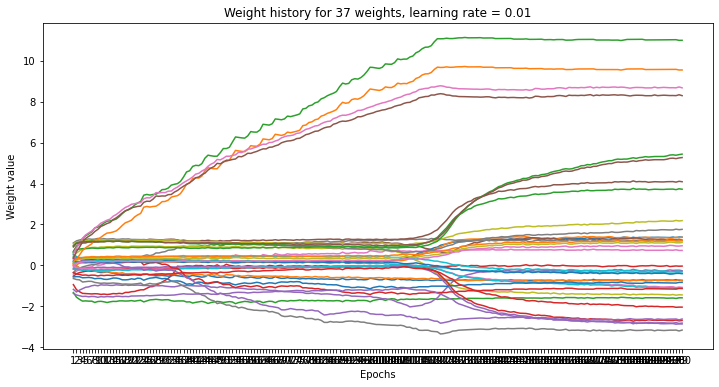

In [251]:
train_and_visualize_model(learning_rate=0.01, epochs=200)